In [ ]:
from pandas import read_csv, DataFrame
from numpy import array, arange, number, mean, std, triu, linspace, meshgrid, column_stack

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import torch
import torch.nn as nn
import torch.optim as optim

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, fixed

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = read_csv('https://raw.githubusercontent.com/ricdirenzo/AAI_master_workshops/refs/heads/main/regression/input/heart_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         498 non-null    float64
 1   smoking        498 non-null    float64
 2   heart_disease  498 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [ ]:
print(data)

        biking    smoking  heart_disease
0    30.801246  10.896608      11.769423
1    65.129215   2.219563       2.854081
2     1.959665  17.588331      17.177803
3    44.800196   2.802559       6.816647
4    69.428454  15.974505       4.062224
..         ...        ...            ...
493  47.660440  27.562464      11.294392
494  45.097203  21.385620       9.616762
495   8.279743   6.423720      13.495168
496  42.345863  20.741328      10.115865
497  30.774254  23.610175      11.843556

[498 rows x 3 columns]


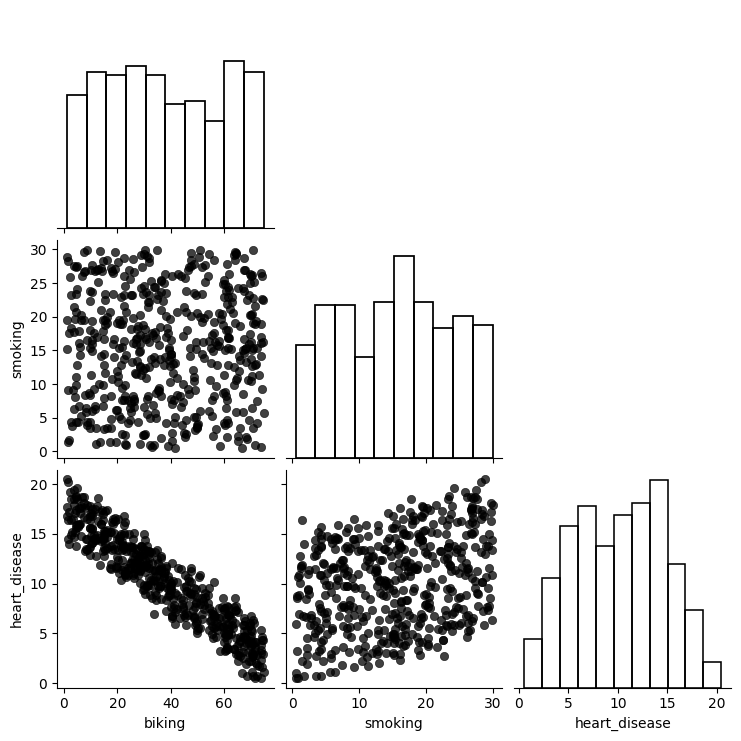

In [ ]:
sns.pairplot(
    data,
    corner=True,
    diag_kws={'fill': 0, 'color': 'black'},
    plot_kws={'edgecolor': 'black', 'facecolor': 'black', 'marker': 'o', 'alpha': 0.75}
);

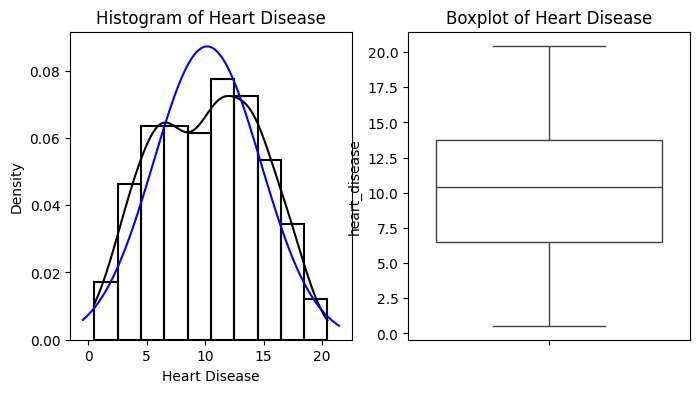

In [ ]:
plt.figure(figsize=(8, 4))

# Create the histogram with the KDE (Kernel Density Estimate) for smooth curve
plt.subplot(1, 2, 1)
sns.histplot(data['heart_disease'], kde=True, stat="density", bins=10,
             color='k', fill=False)

# Overlay the theoretical normal curve
mean = data['heart_disease'].mean()
std_dev = data['heart_disease'].std()
xmin, xmax = plt.xlim()
x = linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'b')

# Title and labels
plt.title('Histogram of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Density')

# Create the boxplot to visualize the distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=data['heart_disease'],
            boxprops=dict(facecolor='none'))

plt.title('Boxplot of Heart Disease');

In [ ]:
X = data[['biking', 'smoking']]
X = sm.add_constant(X)  # Aggiunge una colonna di 1 per l'intercetta

y = data['heart_disease']

# Fit del modello di regressione lineare
model = sm.OLS(y, X).fit()

# Visualizzazione dei risultati
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          heart_disease   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Wed, 15 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:15:50   Log-Likelihood:                -493.68
No. Observations:                 498   AIC:                             993.4
Df Residuals:                     495   BIC:                             1006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9847      0.080    186.988      0.0

In [ ]:
model.resid.mean()

1.875518928025405e-14

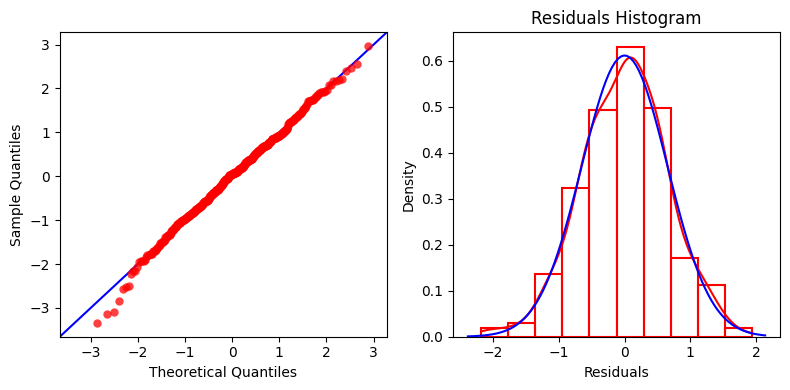

In [ ]:
# Create the figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# First plot: QQ plot
sm.qqplot(model.resid, fit=True, line='45', ax=ax[0])
# Get the bisector line (45-degree line)
line = ax[0].get_lines()[1]
line.set_color('b')
# Place it behind the points
line.set_zorder(1)

points = ax[0].get_lines()[0]
points.set_markerfacecolor('r')
points.set_markeredgecolor('None')
points.set_alpha(0.75)
# Place the points above the bisector
points.set_zorder(2)

# Second plot: Histogram with density curve
sns.histplot(model.resid, kde=True, stat="density", bins=10,
             color='r', fill=False, ax=ax[1])
xmin, xmax = ax[1].get_xlim()
x = linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, model.resid.mean(), model.resid.std())
ax[1].plot(x, p, 'b')
ax[1].set_title('Residuals Histogram')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Density')

plt.tight_layout();

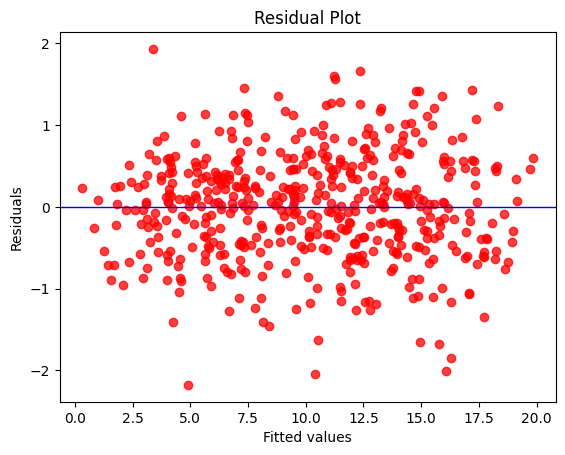

In [ ]:
plt.scatter(model.fittedvalues, model.resid, color='r', alpha=0.75)
plt.axhline(y=model.resid.mean(), color='b', lw=1)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

In [ ]:
vif_data = DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Visualizzare il risultato
print(vif_data)

  Variable       VIF
0    const  7.476466
1   biking  1.000229
2  smoking  1.000229


In [ ]:
# sns.pairplot(
#     data,
#     corner=True,
#     diag_kws={'fill': 0, 'color': 'black', 'linewidth': 1},
#     plot_kws={'edgecolor': 'black', 'facecolor': 'black', 'alpha': 0.75}
# );

Seems to be a linear relationship between TV advertising spending and sales. As spending increases, sales also increase in a linear way.

In [ ]:
# corr = data.select_dtypes(include=[number]).corr()

# # Getting the Upper Triangle of the co-relation matrix
# diag = triu(corr)

# sns.heatmap(corr, annot=True, mask=diag, cmap='Blues')
# plt.title('Correlation Heatmap\n');

The Pearson correlation coefficient ($\rho \approx .9$) suggests a strong linear correlation between TV advertising spending and sales.

In [ ]:
# plt.scatter(x=data['TV'], y=data['Sales'], color='k', alpha=0.75)
# plt.xlabel('TV')
# plt.ylabel('Sales')
# plt.title('Relationship between Sales and TV\n');

This code defines and trains a simple feed-forward neural network with one feature (TV ad spend) and one output (Sales). The model is trained using gradient descent, and the loss is minimized through multiple epochs. After training, the performance of the model is evaluated using R-squared, and the loss curve is plotted to show training progress.

# Data Preprocessing

## Selecting features and target

In [ ]:
X, y = data.iloc[:, [0, 1]], data.iloc[:, [2]]



*   `X` extracts the 1st column (TV advertising spending) from the dataset.
*   `y` extracts the 4th column (Sales) from the dataset.

`X` represents the features (input), `y` represents the target variable (output).

## Normalizing the Features

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)



*   **StandardScaler**: normalizes the feature data to have a mean $ \mu $ of 0 and a standard deviation $ \sigma $ of 1. This is often done to improve model performance and convergence during training, especially when features have different units or scales.

$$
Z = \frac{X-\mu}{\sigma}
$$

*   **fit_transform** calculates the mean and standard deviation of the input (X) and scales the data accordingly.



## Converting data to PyTorch tensors

In [ ]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)



*   `torch.tensor` converts the NumPy arrays (`X` and `y`) into PyTorch tensors. This allows the data to be used in a PyTorch model for training.



# Define the Neural Network Model

In [ ]:
class SimpleFeedForward(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(SimpleFeedForward, self).__init__()
    # Input layer
    self.fc1 = nn.Linear(input_size, hidden_size)
    # ReLU activation function for the hidden layer
    self.act = nn.ReLU()
    # Output layer, no activation
    self.fc2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    # Pass input through the first layer
    res = self.fc1(x)
    # Apply the ReLU activation function
    res = self.act(res)
    # Pass through the output layer
    res = self.fc2(res)
    return res

## Define the `__init__` method
Defines the structure of the neural network. The model consists of:

*   The first layer `fc1` (input layer) that takes the input size and produces hidden_size outputs.
*   The activation function `act` (ReLU) applied after the first layer. ReLU introduces non-linearity, helping the model learn more complex relationships.
*   The second layer `fc2` (output layer) that takes the hidden layer's output and generates the final prediction.




## Define the Forward method
Defines how data flows through the network:

*   The input (`x`) is passed through the first layer (`fc1`).
*   The ReLU activation is applied to the output of the first layer.
*   Finally, the transformed data is passed through the second layer (`fc2`) to get the final prediction.




## Compute R-squared
This method calculates how well the model's predictions match the actual values. R-squared is a measure of goodness-of-fit, where values close to 1 indicate better model performance.




In [ ]:
def calculate_r_squared(model, X, y):
    model.eval()
    with torch.no_grad():
        y_pred = model(X)

    y_true = y.numpy()
    y_pred = y_pred.numpy()

    return r2_score(y_true, y_pred)

# Set Up the model, loss, and optimizer

## Define model parameters

In [ ]:
# Only one feature: TV ad spending
input_size = 2
# Number of neurons in the hidden layer
hidden_size = 4
# Single output: Sales prediction
output_size = 1



*   `input_size = 1`: since there is only one input feature (TV ad spending).
*   `hidden_size = 4`: you can experiment with different sizes, but here it's set to 4 neurons.
*   `output_size = 1`: the model predicts a single output (Sales).



## Create the Model

In [ ]:
model = SimpleFeedForward(input_size, hidden_size, output_size)

*   Creates an instance of the neural network model with the specified parameters (`input_size`, `hidden_size`, `output_size`).


## Define loss function and optimizer

In [ ]:
# Mean Squared Error Loss
criterion = nn.MSELoss()
# Stochastic Gradient Descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)



*   **Loss function (MSE)** measures the difference between predicted sales and actual sales. The goal is to minimize this value during training.
*   **Optimizer (SGD)** updates the weights of the model using Stochastic Gradient Descent, with a learning rate of `0.0001`.



# Training the model

## Set training parameters

In [ ]:
# Number of training epochs
num_epochs = 100_000
# List to store the loss values over epochs
loss_values = []



*   `num_epochs = 100000` the number of iterations (epochs) over the entire dataset to train the model.
*   `loss_values` list to store the loss value at each epoch for later visualization.



## Training Loop

In [ ]:
for epoch in range(num_epochs):
  # Forward pass: Get predictions
  outputs = model(X)
  # Compute the loss
  loss = criterion(outputs, y)

  # Zero the gradients
  optimizer.zero_grad()
  # Backward pass: Compute the gradients
  loss.backward()
  # Update the model parameters
  optimizer.step()
  # Store the loss value
  loss_values.append(loss.item())
  if (epoch + 1) % 1000 == 0:
        print(f'epoch [{epoch + 1:>{len(str(num_epochs))}}/{num_epochs}] '
              f'loss: {loss.item():.4f}')


epoch [  1000/100000]  loss: 69.5464
epoch [  2000/100000]  loss: 3.8053
epoch [  3000/100000]  loss: 0.8006
epoch [  4000/100000]  loss: 0.6571
epoch [  5000/100000]  loss: 0.6119
epoch [  6000/100000]  loss: 0.5786
epoch [  7000/100000]  loss: 0.5534
epoch [  8000/100000]  loss: 0.5340
epoch [  9000/100000]  loss: 0.5186
epoch [ 10000/100000]  loss: 0.5080
epoch [ 11000/100000]  loss: 0.5006
epoch [ 12000/100000]  loss: 0.4940
epoch [ 13000/100000]  loss: 0.4884
epoch [ 14000/100000]  loss: 0.4838
epoch [ 15000/100000]  loss: 0.4804
epoch [ 16000/100000]  loss: 0.4777
epoch [ 17000/100000]  loss: 0.4756
epoch [ 18000/100000]  loss: 0.4738
epoch [ 19000/100000]  loss: 0.4725
epoch [ 20000/100000]  loss: 0.4714
epoch [ 21000/100000]  loss: 0.4704
epoch [ 22000/100000]  loss: 0.4695
epoch [ 23000/100000]  loss: 0.4686
epoch [ 24000/100000]  loss: 0.4678
epoch [ 25000/100000]  loss: 0.4671
epoch [ 26000/100000]  loss: 0.4665
epoch [ 27000/100000]  loss: 0.4657
epoch [ 28000/100000]  loss


*   **Forward pass**: The input `X` is passed through the model to get the predictions (`outputs`).
*   **Compute loss**: The loss is computed using the predicted values (`outputs`) and actual values (`y`).
*   **Backward pass**: The gradients are calculated by calling `loss.backward()`.
*   **Parameter update**: The optimizer updates the model parameters using `optimizer.step()`.
*   **Store loss**: The current loss value is stored in `loss_values` for later analysis.
*   **Print progress**: Every 1000 epochs, the current loss is printed to show the model's progress.





# Evaluate the model and plot results

## Calculate R-squared

In [ ]:
r2 = calculate_r_squared(model, X, y)
print(f'R-squared: {r2:.4f}')

R-squared: 0.9787




*   After training, the `r_squared` method is called to evaluate the model’s performance on the training data. It provides an indication of how well the model fits the data.


## Plot loss curve

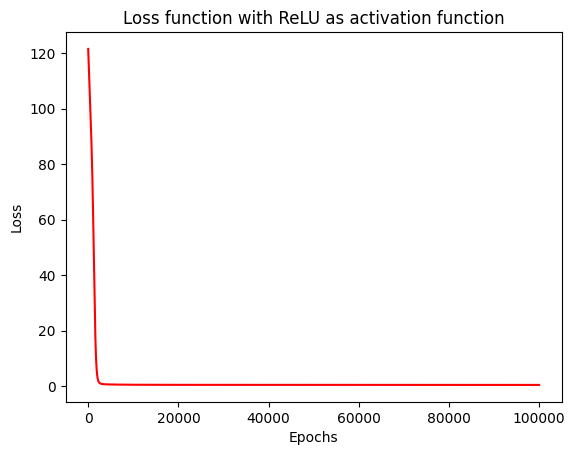

In [ ]:
plt.plot(loss_values, 'r')
plt.title('Loss function with ReLU as activation function')
plt.xlabel('Epochs')
plt.ylabel('Loss');



*   **Plot**: A plot of the loss function is generated to visualize how the loss decreases over the epochs. This helps to confirm whether the model is learning over time and converging.


## Visualize the original data and the fitted line

In [ ]:
# # Set the model to evaluation mode
# model.eval()
# # Disable gradient calculation during prediction
# with torch.no_grad():
#   # Get predictions and convert them to numpy
#   predicted = model(X).detach().numpy()

# # Original data (you can also use scatter if preferred)
# plt.scatter(X.numpy(), y.numpy(), color='k', label='Original Data', alpha=0.75)

# # The fitted line from the model
# plt.plot(X.numpy(), predicted, 'b.', lw=2, label='Fitted Line')

# plt.title('Linear Regression: data and fitted Line')
# plt.xlabel('TV')
# plt.ylabel('Sales');

In [ ]:
def plot_regression_plane_interactive(model, X, y, scaler, azim=80, elev=10):
    # Create the grid for the regression plane
    x_range = linspace(X[:, 0].min(), X[:, 0].max(), 50)
    y_range = linspace(X[:, 1].min(), X[:, 1].max(), 50)
    x_grid, y_grid = meshgrid(x_range, y_range)

    # Rescale the grid (invert normalization)
    grid_data = column_stack((x_grid.ravel(), y_grid.ravel()))
    grid_data_scaled = scaler.transform(grid_data)  # Normalize the grid
    grid_tensor = torch.tensor(grid_data_scaled, dtype=torch.float32)

    # Model predictions on the grid
    with torch.no_grad():
        z_grid = model(grid_tensor).numpy().reshape(x_grid.shape)

    # Create the figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Real data (scatter plot)
    ax.scatter(X[:, 0], X[:, 1], y, color='k', alpha=0.75, label="Real data")

    # Regression plane surface
    ax.plot_surface(x_grid, y_grid, z_grid, color='b', alpha=0.75, label="Regression plane")

    # Set the view angle
    ax.view_init(azim=azim, elev=elev)

    # Labels and title
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title('3D Regression Plane')

    plt.legend()
    plt.show()

In [ ]:
X_original = data.iloc[:, [0, 1]].values
y_original = data.iloc[:, 2].values

# Example scaler (replace with your actual scaler if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Assuming 'model' is your trained model
interactive_plot = interactive(plot_regression_plane_interactive,
                               model=fixed(model),
                               X=fixed(X_original),
                               y=fixed(y_original),
                               scaler=fixed(scaler),
                               azim=(0, 360, 1),
                               elev=(-90, 90, 1))

# Display the interactive plot
interactive_plot

interactive(children=(IntSlider(value=80, description='azim', max=360), IntSlider(value=10, description='elev'…



*   The model is set to evaluation mode with `model.eval()` to disable training-specific layers.
*   Predictions are made with `model(X)` and converted to NumPy using `.detach().numpy()` to avoid gradient calculation.
*   The original data and predicted regression line are plotted with `plt.scatter()` and `plt.plot()`.
*   The plot is enhanced with a title and axis labels for clarity.


